**Netflix is a popular streaming service that offers a vast catalog of movies, TV shows, and original contents. This dataset is a cleaned version of the original version which can be found here. The data consist of contents added to Netflix from 2008 to 2021. The oldest content is as old as 1925 and the newest as 2021. The purpose of this data analysis is to perform EDA and answer some questions.** 

## Questions

1. What is the overall distribution of content types (TV shows vs. movies) in the dataset?
2. Which countries have produced the most content on Netflix?
3. What are the top 3 countries with the highest number of movies and TV shows combined?
4. Which year had the highest number of content releases?
5. Which year had the highest number of Movie and TV shows releases?
6. Which year had the highest number of content additions on Netflix?
7. Which rating category has the highest number of content items?
8. Who are the top 5 directors with the most content available on Netflix
9. Which genres are most prevalent in the dataset?
10. Extract the data of content which are produced in India.





## Exploratory Data Analysis

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
#Loadoing the dataset
df=pd.read_csv("netflix.csv")

In [3]:
data=df.copy()
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [4]:
#info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
#cheking for the null values
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [7]:
#droping unwanted features
data.drop('show_id',axis=1,inplace=True)

In [8]:
data["title"].value_counts()

9-Feb                   2
15-Aug                  2
22-Jul                  2
Dick Johnson Is Dead    1
SGT. Will Gardner       1
                       ..
Mercy Black             1
The Trap                1
Pinky Memsaab           1
Love O2O                1
YOM                     1
Name: title, Length: 8787, dtype: int64

In [9]:
#checking for duplicate records
data.duplicated().sum()

3

In [10]:
#droping the duplicate records
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [11]:
data["director"].value_counts()

Not Given                         2587
Rajiv Chilaka                       20
Raúl Campos, Jan Suter              18
Alastair Fothergill                 18
Marcus Raboy                        16
                                  ... 
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Mozez Singh                          1
Name: director, Length: 4528, dtype: int64

In [12]:
data['country'].value_counts()

United States     3240
India             1056
United Kingdom     638
Pakistan           420
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64

In [13]:
#droping some records with unwanted (null) values
data.drop(data[data['country']=='Not Given'].index,inplace=True)


In [14]:
data['release_year'].value_counts()

2018    1111
2017    1001
2019     992
2020     905
2016     890
        ... 
1966       1
1959       1
1925       1
1947       1
1961       1
Name: release_year, Length: 74, dtype: int64

In [15]:
data['rating'].value_counts()

TV-MA       3111
TV-14       2063
TV-PG        835
R            790
PG-13        487
TV-Y7        308
TV-Y         284
PG           282
TV-G         209
NR            79
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: rating, dtype: int64

### 1. What is the overall distribution of content types (TV shows vs. movies) in the dataset?

Movie      0.690235
TV Show    0.309765
Name: type, dtype: float64


<AxesSubplot:xlabel='type', ylabel='count'>

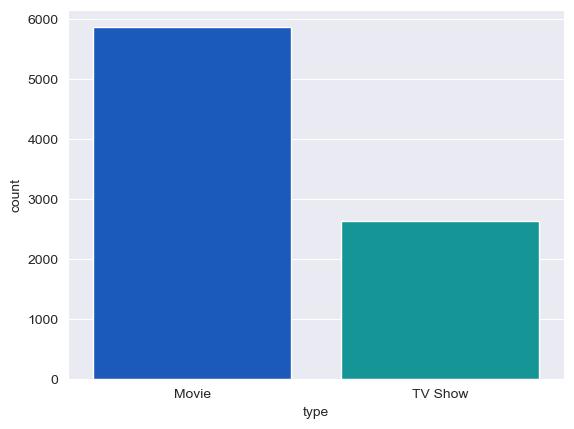

In [16]:
type_perc=data['type'].value_counts(normalize=True)

print(type_perc)

sns.countplot(x="type",data=data,palette="winter")


#### The distribution of content types is as follows:
#### Movies: 70% of the total content in the dataset. and TV Shows: 30% of the total content in the dataset.
**This indicates that the majority of the content added to Netflix from 2008 to 2021 consists of movies, while TV shows make up a smaller portion.**

### 2. Which countries have produced the most content on Netflix?
### 3. What are the top 5 countries with the highest number of movies and TV shows combined?

<AxesSubplot:xlabel='count', ylabel='country'>

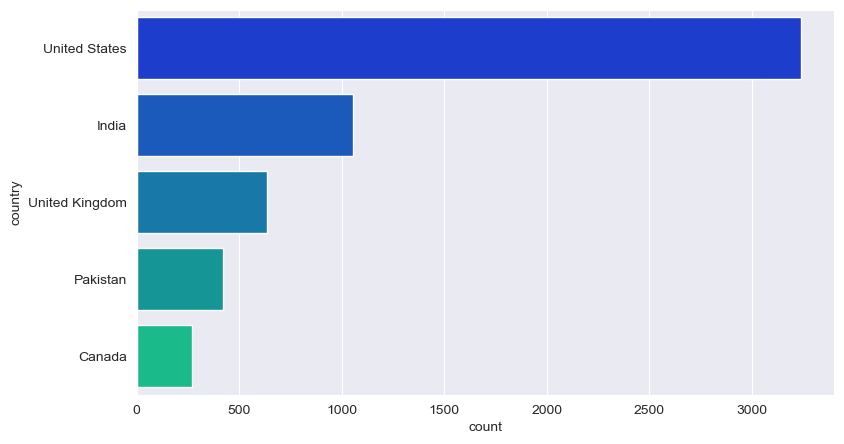

In [17]:
top_countries=data['country'].value_counts().head(5)


plt.figure(figsize=(9,5))
sns.countplot(y=data["country"],palette="winter",order=top_countries.index)

#### we find that the country with the highest number of content additions on Netflix is the United States. And next is India.

### 4. Which year had the highest number of content releases?

<AxesSubplot:xlabel='release_year', ylabel='count'>

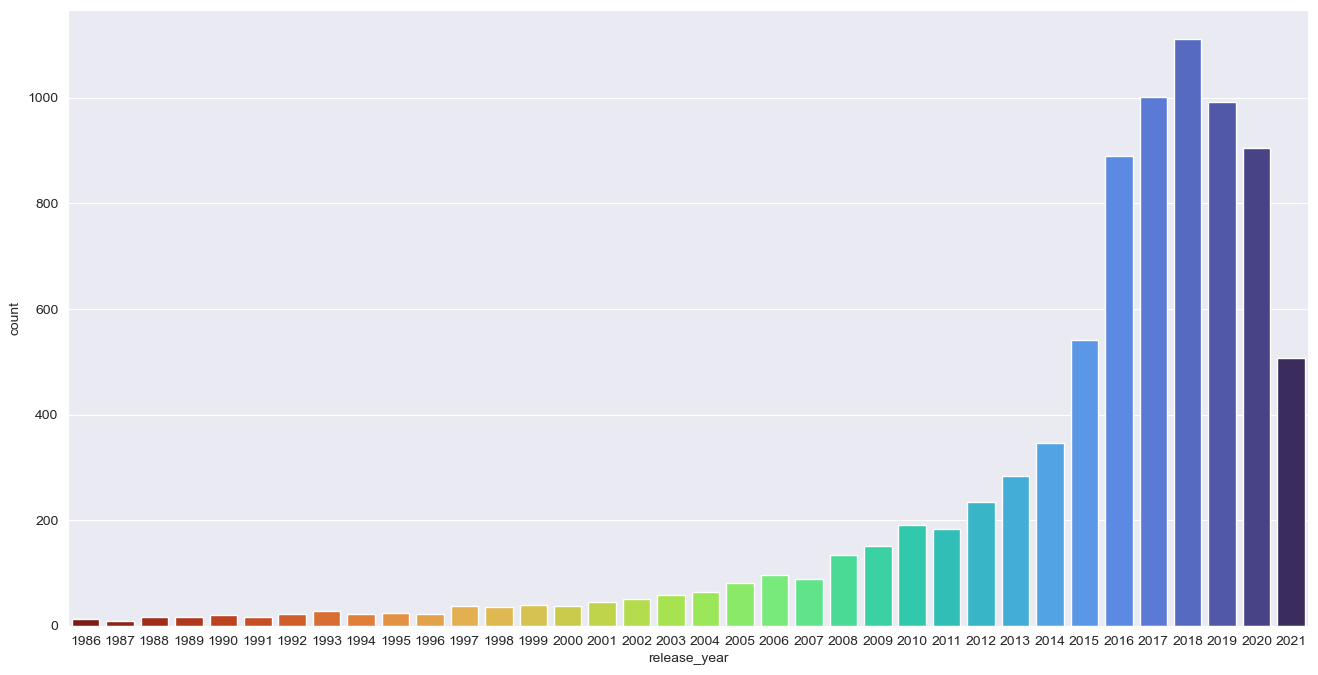

In [18]:
r_y=data[data["release_year"]>1985]

plt.figure(figsize=(16,8))

sns.countplot(x=r_y['release_year'],palette="turbo_r")

#### Based on the dataset, the year with the highest number of content releases was 2018.


###  5.Which year had the highest number of Movie and TV shows releases?

<AxesSubplot:xlabel='release_year', ylabel='count'>

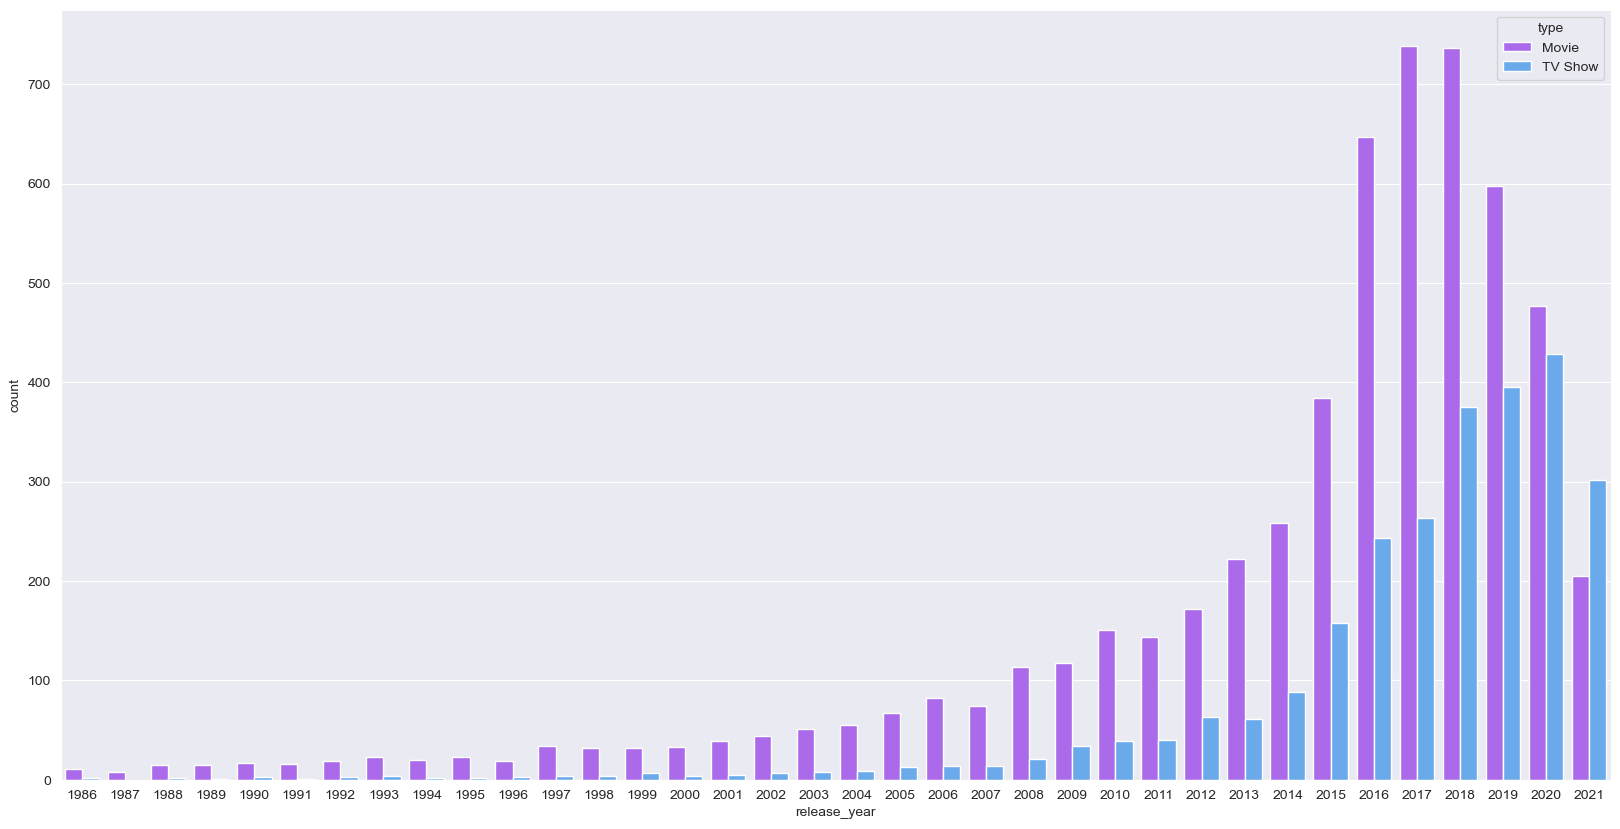

In [19]:
r_y=data[data["release_year"]>1985]

plt.figure(figsize=(20,10))

sns.countplot(x=r_y['release_year'],hue=data['type'],palette="cool_r")

In [20]:
movie=data[data['type']=='Movie']
m_high=movie['release_year'].value_counts()
m_high

2017    738
2018    736
2016    647
2019    597
2020    477
       ... 
1966      1
1961      1
1946      1
1963      1
1947      1
Name: release_year, Length: 73, dtype: int64

#### According to the dataset, the year with the highest number of movie releases is 2018 . On the other hand, the year with the highest number of TV show releases is 2019.

### 6. Which year had the highest number of content additions on Netflix?


In [21]:
data['added_year']=pd.DatetimeIndex(data['date_added']).year
data

,type,title,director,country,date_added,release_year,rating,duration,listed_in,added_year
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries,2021
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021
...,...,...,...,...,...,...,...,...,...,...
8785,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",2017
8786,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV,2018
8787,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",2016
8788,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV,2018


In [22]:
data['added_year'].value_counts(sort=False)

2021    1343
2019    1975
2018    1620
2020    1838
2017    1163
2016     424
2015      81
2014      24
2013      11
2012       3
2011      13
2009       2
2008       2
2010       1
Name: added_year, dtype: int64

<AxesSubplot:xlabel='added_year', ylabel='count'>

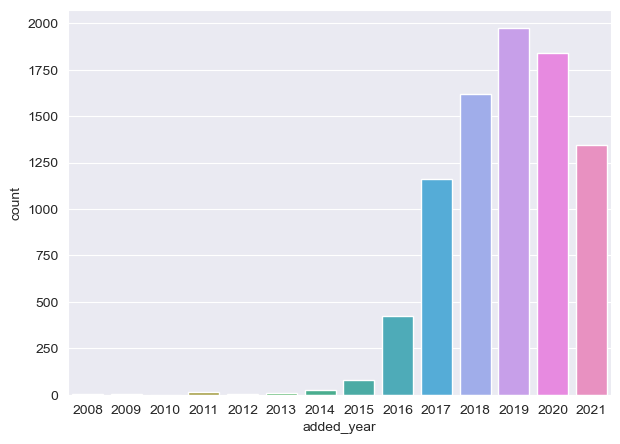

In [23]:
plt.figure(figsize=(7,5))
sns.countplot(x=data['added_year'])

#### The year with the highest number of content additions on Netflix is 2019.

###  7. Which rating category has the highest number of content items?


In [24]:
data['rating'].value_counts()

TV-MA       3111
TV-14       2063
TV-PG        835
R            790
PG-13        487
TV-Y7        308
TV-Y         284
PG           282
TV-G         209
NR            79
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

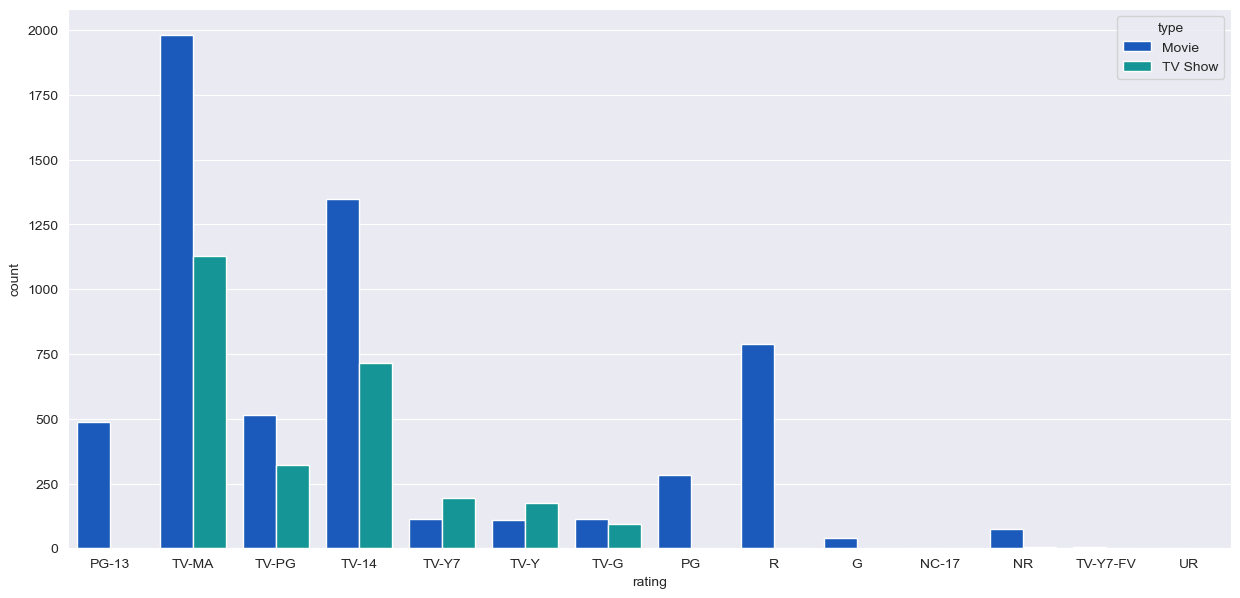

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(x=data['rating'],hue=data['type'],palette='winter')

#### we found that the rating category with the highest number of content items is "TV-MA".

### 8. Who are the top 5 directors with the most content available on Netflix?


<AxesSubplot:xlabel='count', ylabel='director'>

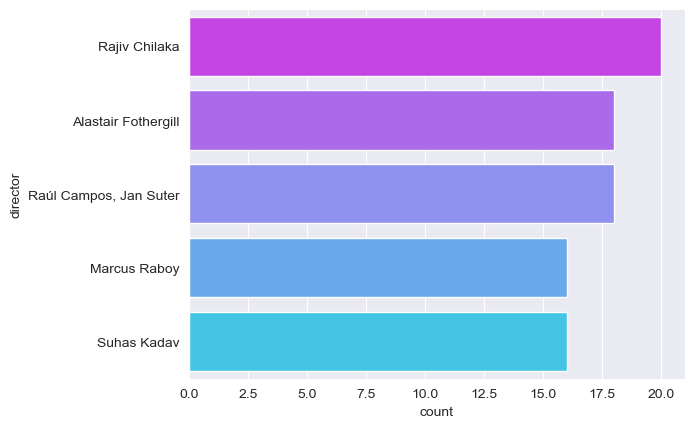

In [26]:
dire=data.drop(data[data['director']=='Not Given'].index)
d_count=dire['director'].value_counts().head()
d_count
sns.countplot(y=dire["director"],palette='cool_r',order=d_count.index)

#### The top 5 directors with the most content available on Netflix are 
#### "Rajiv Chilaka" , "Alastair Fothergill"  , "Raúl Campos, Jan Suter" , "Marcus Raboy" , "Suhas Kadav "  

### 9. Which genres are most prevalent in the dataset?


In [27]:
genres=data['listed_in'].value_counts().head(10)
genres

Documentaries                                       350
Dramas, International Movies                        347
Stand-Up Comedy                                     321
Comedies, Dramas, International Movies              265
Dramas, Independent Movies, International Movies    245
Kids' TV                                            218
Children & Family Movies, Comedies                  190
Children & Family Movies                            183
Dramas, International Movies, Romantic Movies       169
Documentaries, International Movies                 168
Name: listed_in, dtype: int64

<AxesSubplot:xlabel='count', ylabel='listed_in'>

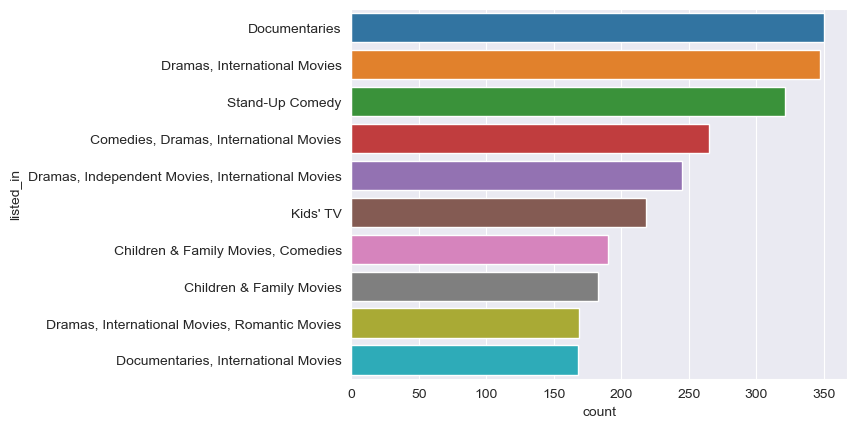

In [28]:
sns.countplot(y=data['listed_in'],order=genres.index)

### 10. What is the average duration of movies and TV shows on Netflix?


In [33]:
movies=data[data['type']=='Movie']


In [30]:
shows=data[data['type']=='TV Show']

In [31]:
movies['duration'].value_counts(sort=True)

90 min     149
97 min     143
94 min     142
93 min     140
91 min     137
          ... 
208 min      1
5 min        1
16 min       1
186 min      1
312 min      1
Name: duration, Length: 200, dtype: int64

In [32]:
shows['duration'].value_counts(sort=True)

1 Season      1761
2 Seasons      420
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
15 Seasons       2
13 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: duration, dtype: int64

### 10. Extract the data of content (Movies/TV shows) which are produced in India.

In [46]:
content_india=data[data['country']=="India"]
content_india

,type,title,director,country,date_added,release_year,rating,duration,listed_in,added_year
7,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",2021
9,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,5/1/2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals",2021
10,Movie,Motu Patlu: Deep Sea Adventure,Suhas Kadav,India,5/1/2021,2014,TV-Y7,76 min,"Children & Family Movies, Comedies",2021
11,Movie,Motu Patlu: Mission Moon,Suhas Kadav,India,5/1/2021,2013,TV-Y7,71 min,"Children & Family Movies, Comedies",2021
29,Movie,Jeans,S. Shankar,India,9/21/2021,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",2021
...,...,...,...,...,...,...,...,...,...,...
8715,TV Show,The Golden Years with Javed Akhtar,Not Given,India,6/1/2017,2016,TV-G,1 Season,"Docuseries, International TV Shows",2017
8721,TV Show,The House That Made Me,Not Given,India,3/31/2017,2015,TV-PG,3 Seasons,"International TV Shows, Reality TV",2017
8724,TV Show,The Jungle Book,Not Given,India,5/11/2019,2010,TV-Y7,1 Season,Kids' TV,2019
8763,Movie,"Twisted Trunk, Big Fat Body",Not Given,India,1/15/2017,2015,TV-14,89 min,"Dramas, International Movies",2017
